# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Sergio Rehbein
- Nombre de alumno 2: Matías Cornejo

\### **Link de repositorio de GitHub Matias:** https://github.com/s-kill/MDS7202

\### **Link de repositorio de GitHub Sergio:** https://github.com/sergiorehbein/MDS7201---Proyecto-de-Ciencia-de-Datos


### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

1. Apache Spark: framework procesamiento distribuido; ventajas: procesamiento masivo, tolerancia a fallos.
2. RDD: colección particionada inmutable; relacionados con dataframes, base estructurada.
3. Transformaciones: operan en RDDs, no ejecutan hasta acción; ej.: map(). Acciones: desencadenan cálculos, retornan valor; ej.: count(). Internamente, genera DAG y ejecuta plan.
4. Particionamiento: distribuye datos eficientemente; impacta rendimiento procesamiento.
5. Spark Driver: ejecución programa, mantiene información. Spark Executor: ejecuta tareas, almacena datos.
6. Catalyst Optimizer: optimiza consultas SQL y dataframes; mejora rendimiento ejecución consultas.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [2]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=304c147a4a57f7580ce04560b4afb67f94061dc8e3416af42449f937d166d5db
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px
!pip install wget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6d1786d8ba6e21502bfe34490d57e2ad1ea7c50a1dd454e71708a383cc1b0632
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [22]:
import wget

# URL de la base de datos y del objeto serializado
url_base_datos = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet"
url_objeto_serializado = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl"

# Descargar la base de datos
wget.download(url_base_datos, 'datos_lab_spark.parquet')

# Descargar el objeto serializado
wget.download(url_objeto_serializado, 'object.pkl')


'object (1).pkl'

Cargue los datos usando **pyspark**

In [23]:
# Escriba su respuesta aquí

from pyspark.sql import SparkSession

# Inicializar SparkSession
spark = SparkSession.builder \
    .appName("Carga de datos en PySpark") \
    .getOrCreate()

# Cargar los datasets desde Colab
datos_lab_spark = spark.read.parquet("/content/datos_lab_spark.parquet")


### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


Estructura de los datos:
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

10 primeras filas del dataset:
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+----------------

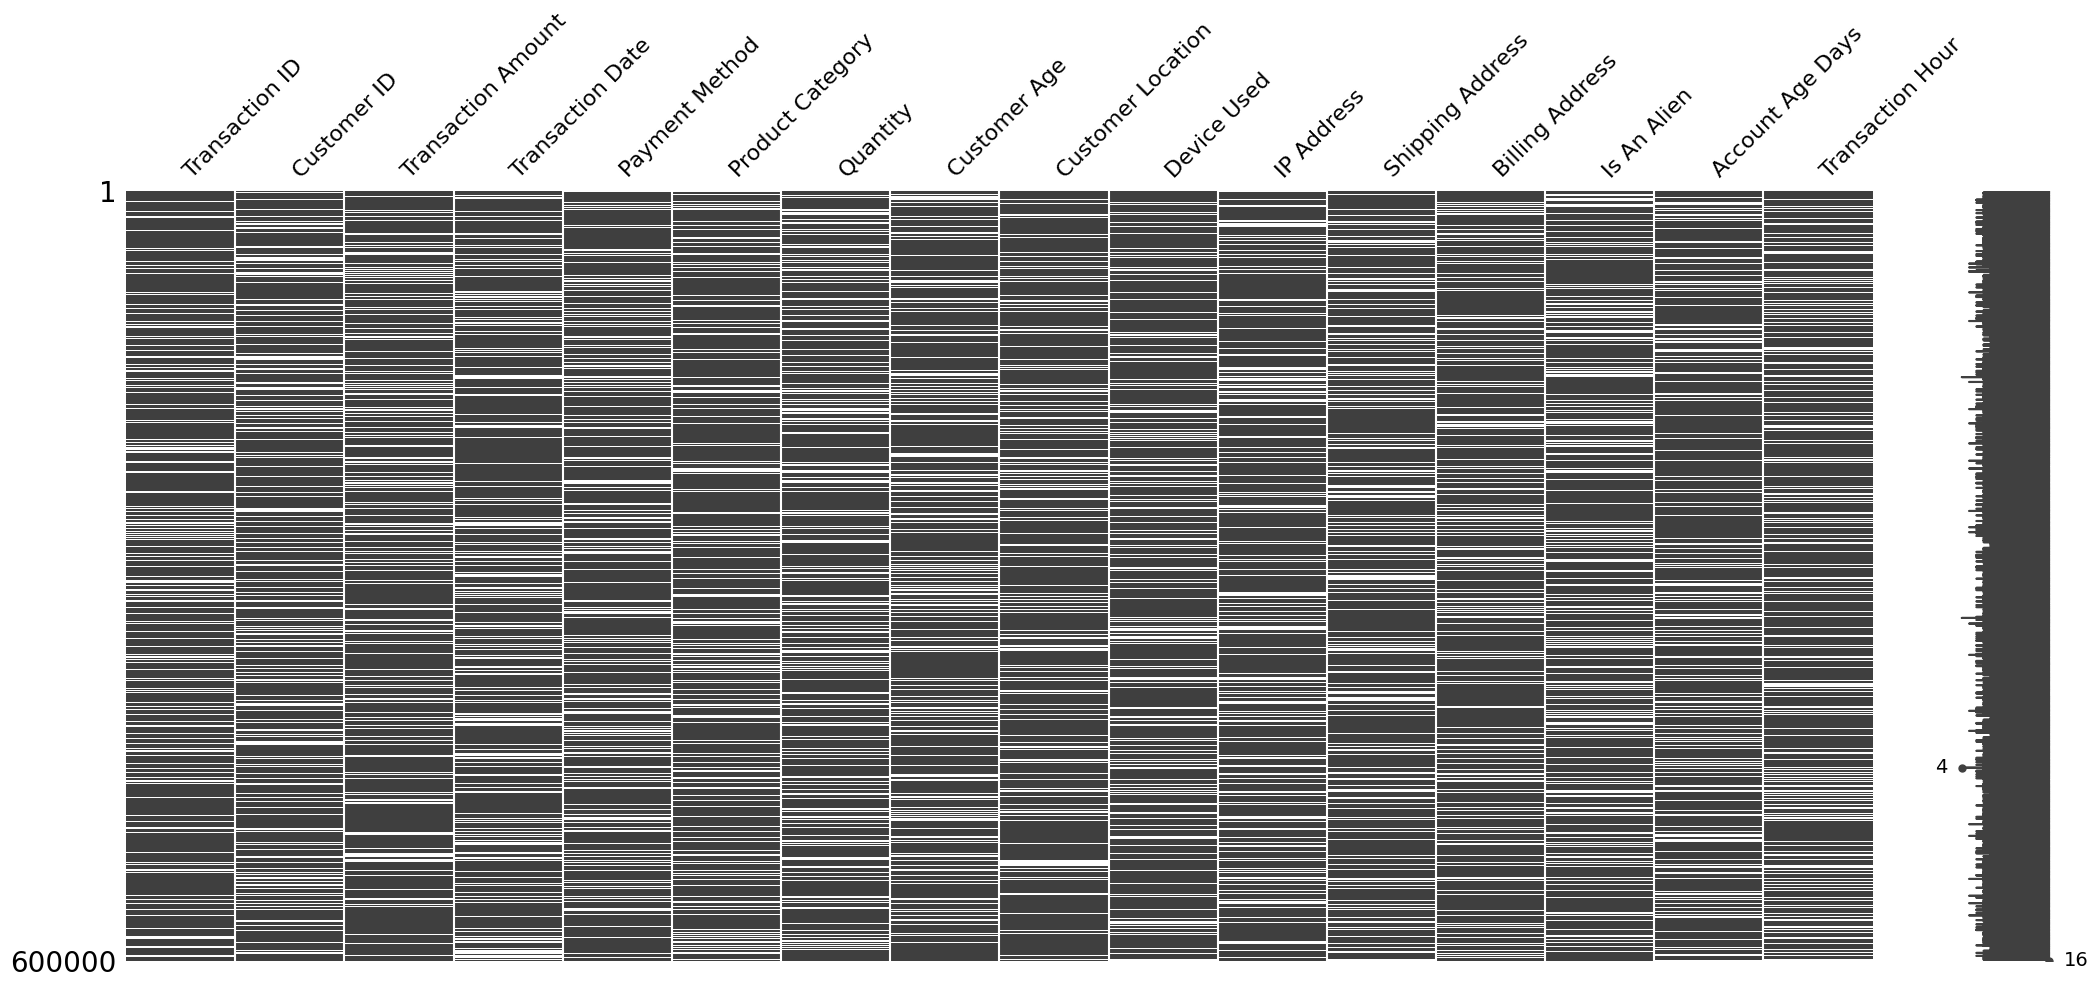

In [24]:
# Escriba su respuesta aquí

# 1. Revisar la estructura de los datos
print("Estructura de los datos:")
datos_lab_spark.printSchema()

# 2. Mostrar las primeras 10 filas del dataset
print("10 primeras filas del dataset:")
datos_lab_spark.show(10)

# 3. Mostrar un muestreo aleatorio del 5% de los datos
print("Muestreo aleatorio del 5%:")
muestreo_aleatorio = datos_lab_spark.sample(False, 0.05)
muestreo_aleatorio.show()

# 4. Revisar los tipos de datos de cada columna
tipos_de_datos = datos_lab_spark.dtypes
print("Tipos de datos por columna:")
for col, tipo in tipos_de_datos:
    print(col + ": " + tipo)

# 5. Cambiar el tipo de datos para la/s columna/s problemáticas
#Dado que los datos no requieren doble precision (double) se transformaran a float o int donde corresponda.
#Transaction Amount: Tiene valores decimales, pero es tipo string, se cambia por float.
datos_lab_spark = datos_lab_spark.withColumn("Transaction Amount", datos_lab_spark["Transaction Amount"].cast(FloatType()))
#Quantity: Tiene valores enteros, pero es tipo string, se cambia por int.
datos_lab_spark = datos_lab_spark.withColumn("Quantity", datos_lab_spark["Quantity"].cast(IntegerType()))
#Customer Age: Tiene valores enteros, pero es tipo string, se cambia por int.
datos_lab_spark = datos_lab_spark.withColumn("Customer Age", datos_lab_spark["Customer Age"].cast(IntegerType()))
#Is An Alien: Tiene valor binario, pero es tipo string, se cambia por int. Tambien puede ser cambiado a bool
datos_lab_spark = datos_lab_spark.withColumn("Is An Alien", datos_lab_spark["Is An Alien"].cast(IntegerType()))
#Account Age Days: Tiene valores enteros, pero es tipo string, se cambia por int.
datos_lab_spark = datos_lab_spark.withColumn("Account Age Days", datos_lab_spark["Account Age Days"].cast(IntegerType()))
#Transaction Hour: Tiene valores enteros, pero es tipo string, se cambia por int.
datos_lab_spark = datos_lab_spark.withColumn("Transaction Hour", datos_lab_spark["Transaction Hour"].cast(IntegerType()))

# 6. Contar la cantidad de datos nulos por variable
# Spark no tiene un método directo para calcular nulos, pero podemos usar el método `isNull()` y `sum()` para cada columna
from pyspark.sql.functions import col, sum
datos_nulos = datos_lab_spark.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in datos_lab_spark.columns))
print("Conteo de nulos para columna")
datos_nulos.show()
#De manera visual podemos usar missingno
import missingno as msno
msno.matrix(datos_lab_spark.toPandas())

# 7. En primer lugar, se recomienda hacer una limpieza de nulos en todas las columnas, sin embargo hay un par de columnas que podrían ser tratas de otra forma con el fin de no perder más datos.
# Se podría realizar una limpieza de nulos en todas la columnas, excepto IP address y Shipping Address.
# IP address no representa una información demasiado valiosa, ya que no representa una ubicación exacta del cliente o puede ser producto de una vpn.
# Por otro lado, Billing Address tiene mayor peso que Shipping Address al momento de realizar una segmentación de clientes, y generalmente Shipping Address es igual al Billing Address.
datos_sin_nulos = datos_lab_spark.dropna(subset=["Transaction ID", "Transaction ID", "Customer ID", "Transaction Amount",
                                                 "Transaction Date", "Payment Method", "Product Category", "Quantity", "Customer Age",
                                                 "Customer Location", "Device Used", "Billing Address",
                                                 "Is An Alien", "Account Age Days", "Transaction Hour"])

# 8. Eliminar datos duplicados
# Con respecto a los duplicados, Transaction ID debería tener un valor único por compra, por lo que hay que eliminar los duplicados de este campo
datos_sin_duplicados = datos_sin_nulos.dropDuplicates(['Transaction ID'])

#Tabla final
print("Tabla sin nulos o duplicados")
datos_sin_duplicados.show()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [25]:
# Métodos útiles de pyspark
from pyspark.sql.functions import col, abs, log, month, when, count, avg
# 1. Agregar columna "Transaction bp"
datos_sin_duplicados = datos_sin_duplicados.withColumn("Transaction bp", log(48 + abs(col("Transaction Amount") * 36)))
# 2. Crear columna "Transaction Month"
datos_sin_duplicados = datos_sin_duplicados.withColumn("Transaction Month", month("Transaction Date"))
# 3. Crear la variable "Type of Purchase"
datos_sin_duplicados = datos_sin_duplicados.withColumn("Type of Purchase",
                                                       when(col("Quantity") <= 5, "Compra minorista")
                                                       .otherwise("Compra mayorista"))
# 4. Print a registros de compras
compras_aliens = datos_sin_duplicados.filter((col("Is An Alien") == 1) & (col("Type of Purchase") == "Compra mayorista"))
print("Tabla donde la transacción pertenece a un Alien y es compra mayorista")
compras_aliens.show()
#Se observa que no existen el caso donde un alien compre mayorista

# 5. Conteo de compras por humanos y aliens
#Se asume que Is An Alien = 0 => Humano
print("Numero de transacciones por especies, se observa desbalance de clases")
purchase_counts = datos_sin_duplicados.groupBy("Is An Alien").agg(count("Transaction ID").alias("Number of Transactions"))
purchase_counts.show()

# 6
print("Promedio por transacción de especies para cada meétodo de pago")
pivot_table = datos_sin_duplicados.groupBy("Payment Method").pivot("Is An Alien").agg(avg("Transaction bp").alias("Promedio por transacción"))
pivot_table.show()

Tabla donde la transacción pertenece a un Alien y es compra mayorista
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of Purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------

### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

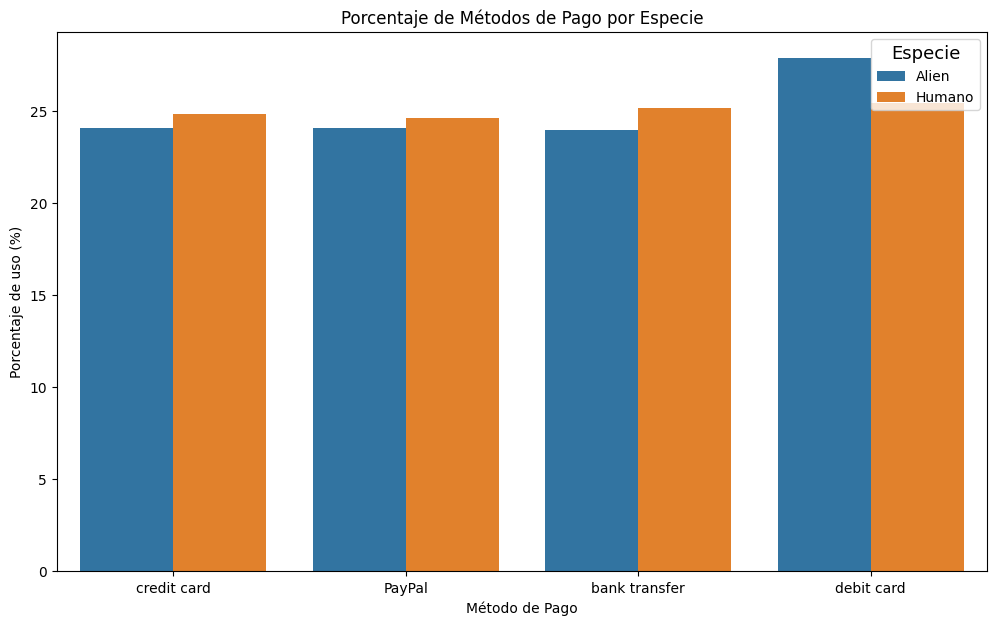

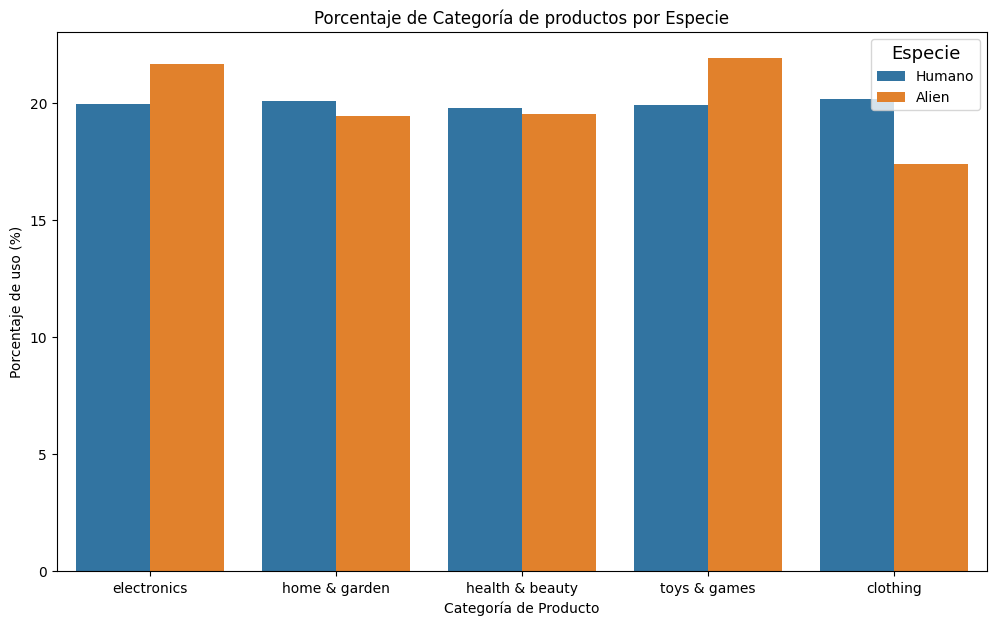

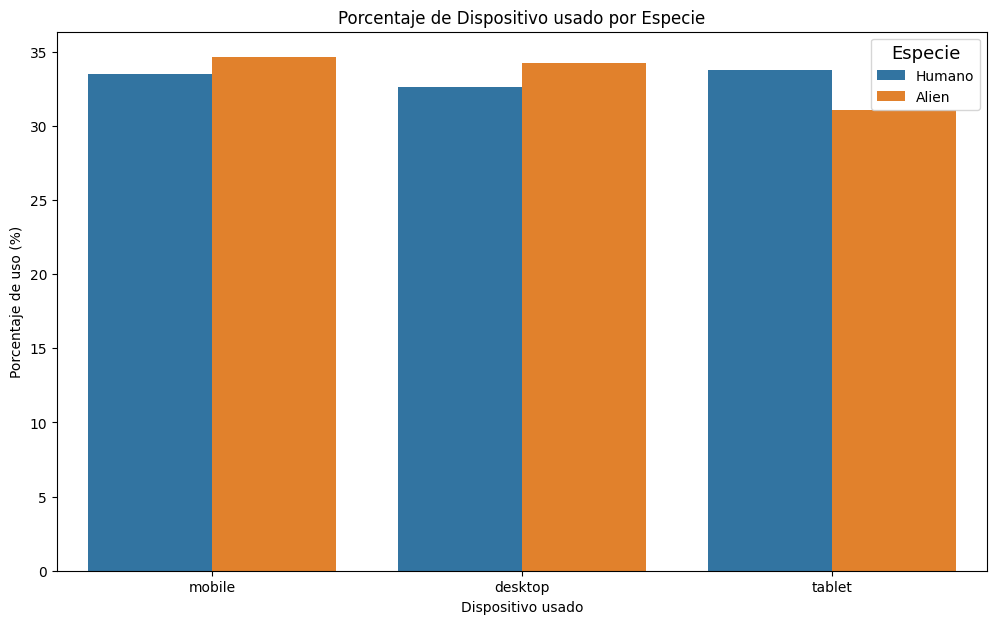

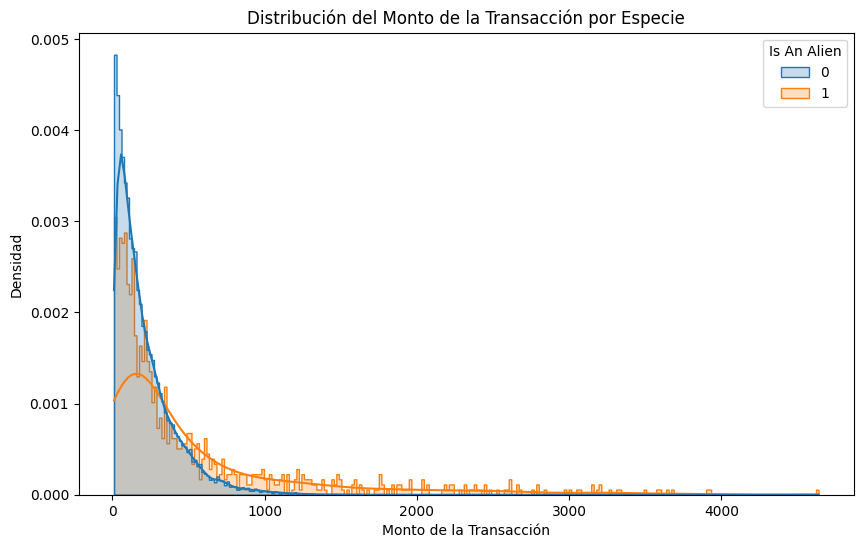

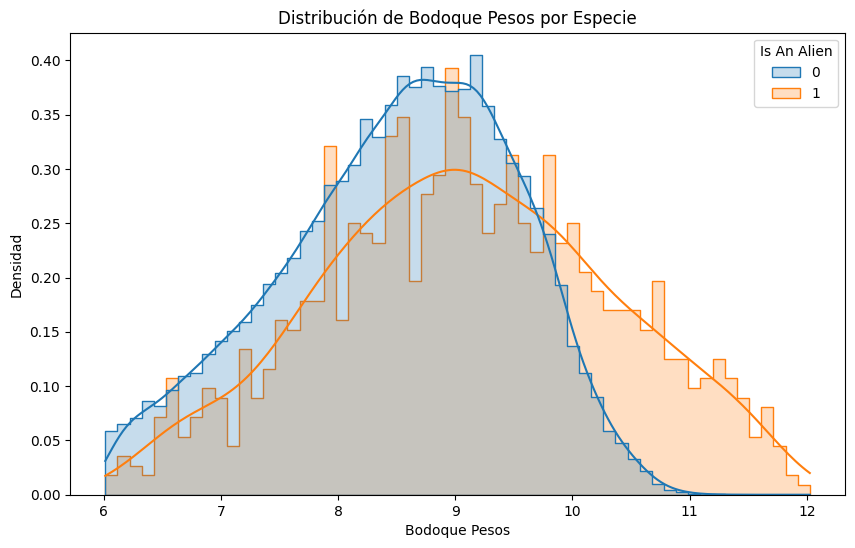

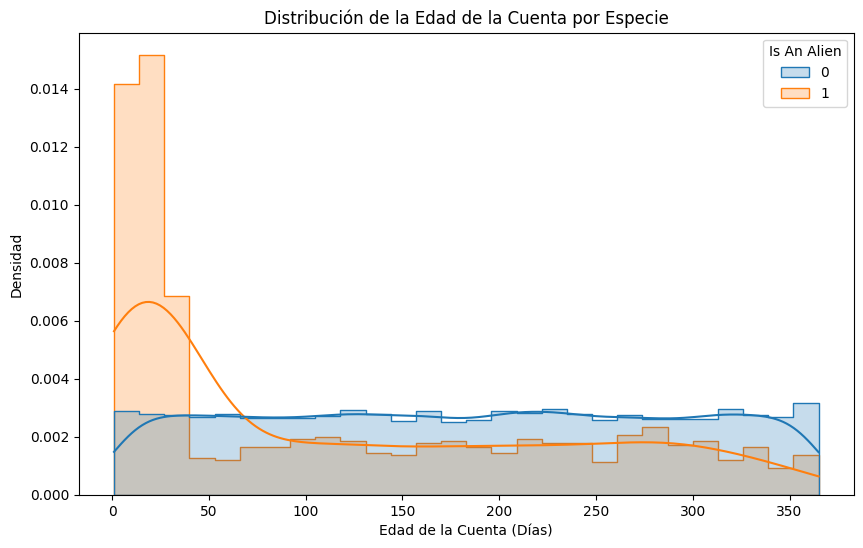

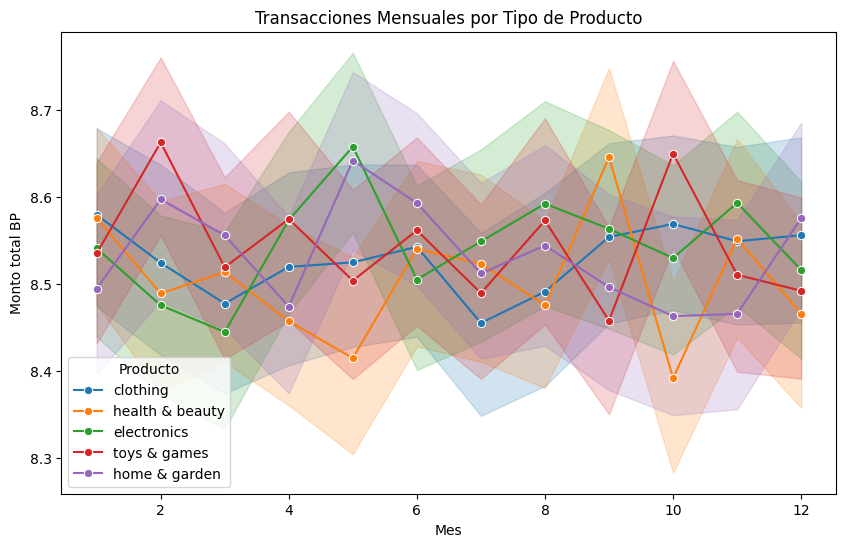

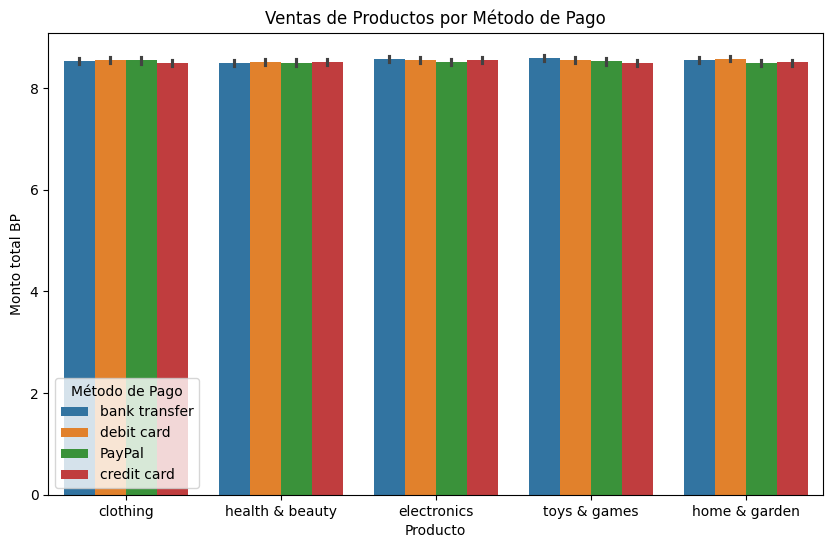

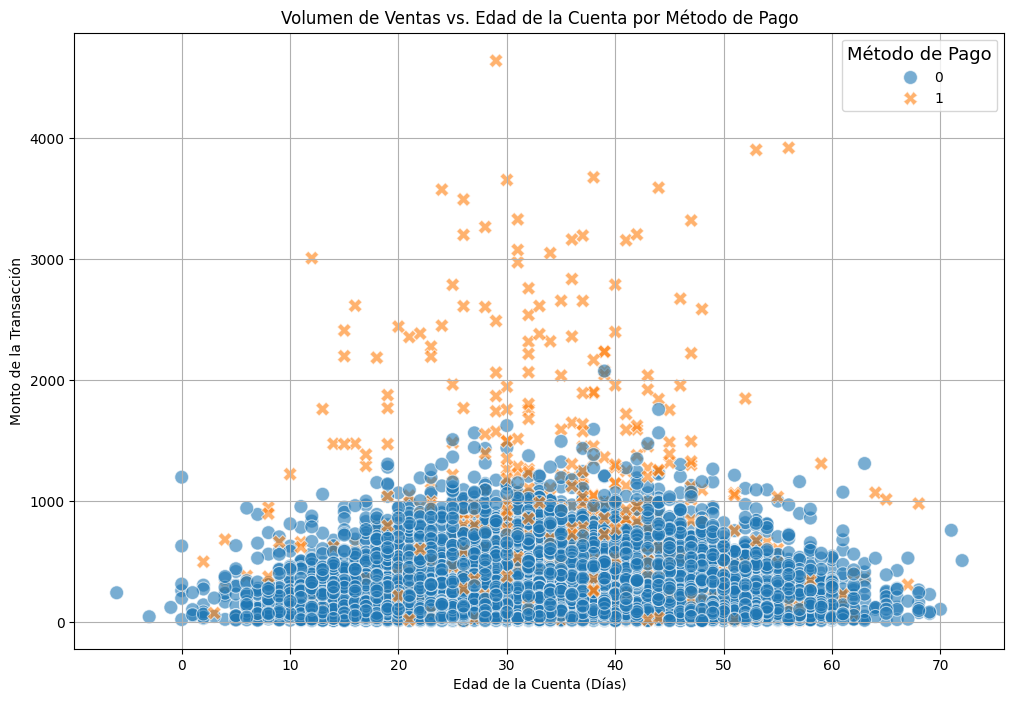

In [26]:
import seaborn as sns

# 1. Conversión a Pandas
df_pandas = datos_sin_duplicados.toPandas()

# 2. Viasualización de Variables Categóricas:
# Las variables categórias interesantes de analizar son "Payment Method", "Product Category" y "Device Used"
# Dado que hay un desbalance entre Humano y Alien, se calculará el uso de Payment Method a nivel porcentual por especie:
#Payment Method
count_df  = datos_sin_duplicados.groupBy(["Payment Method","Is An Alien"]).count()
total_df = datos_sin_duplicados.groupBy("Is An Alien").count().withColumnRenamed("count", "Total")
result_df = count_df.join(total_df, "Is An Alien")
result_df = result_df.withColumn("Percentage", (col("count") / col("Total")) * 100)
result_df = result_df.withColumn("Especie", when(col("Is An Alien") == '1', "Alien").otherwise("Humano"))
result_df = result_df.select("Payment Method", "Especie", "Percentage")
result_df_pd = result_df.toPandas()
plt.figure(figsize=(12, 7))
sns.barplot(data=result_df_pd, x='Payment Method', y='Percentage', hue='Especie')
plt.title('Porcentaje de Métodos de Pago por Especie')
plt.xlabel('Método de Pago')
plt.ylabel('Porcentaje de uso (%)')
plt.legend(title='Especie', title_fontsize='13', loc='upper right')
plt.show()

#Product Category
count_df  = datos_sin_duplicados.groupBy(["Product Category","Is An Alien"]).count()
total_df = datos_sin_duplicados.groupBy("Is An Alien").count().withColumnRenamed("count", "Total")
result_df = count_df.join(total_df, "Is An Alien")
result_df = result_df.withColumn("Percentage", (col("count") / col("Total")) * 100)
result_df = result_df.withColumn("Especie", when(col("Is An Alien") == '1', "Alien").otherwise("Humano"))
result_df = result_df.select("Product Category", "Especie", "Percentage")
result_df_pd = result_df.toPandas()
plt.figure(figsize=(12, 7))
sns.barplot(data=result_df_pd, x='Product Category', y='Percentage', hue='Especie')
plt.title('Porcentaje de Categoría de productos por Especie')
plt.xlabel('Categoría de Producto')
plt.ylabel('Porcentaje de uso (%)')
plt.legend(title='Especie', title_fontsize='13', loc='upper right')
plt.show()

#Device Used
count_df  = datos_sin_duplicados.groupBy(["Device Used","Is An Alien"]).count()
total_df = datos_sin_duplicados.groupBy("Is An Alien").count().withColumnRenamed("count", "Total")
result_df = count_df.join(total_df, "Is An Alien")
result_df = result_df.withColumn("Percentage", (col("count") / col("Total")) * 100)
result_df = result_df.withColumn("Especie", when(col("Is An Alien") == '1', "Alien").otherwise("Humano"))
result_df = result_df.select("Device Used", "Especie", "Percentage")
result_df_pd = result_df.toPandas()
plt.figure(figsize=(12, 7))
sns.barplot(data=result_df_pd, x='Device Used', y='Percentage', hue='Especie')
plt.title('Porcentaje de Dispositivo usado por Especie')
plt.xlabel('Dispositivo usado')
plt.ylabel('Porcentaje de uso (%)')
plt.legend(title='Especie', title_fontsize='13', loc='upper right')
plt.show()

# 3. Visualización Variables Numericas

# Se aplica una normalización al histograma para no observar el imbalance de datos
# Distribución del monto de la transacción
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x='Transaction Amount', hue='Is An Alien', element='step', stat="density", kde=True, common_norm=False)
plt.title('Distribución del Monto de la Transacción por Especie')
plt.xlabel('Monto de la Transacción')
plt.ylabel('Densidad')
plt.show()

#De Este grafico se observa que los aliens tienden a tener montos de transacción más altos que los humanos.

# Distribución de Bodoque pesos
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x='Transaction bp', hue='Is An Alien', element='step', stat="density", kde=True, common_norm=False)
plt.title('Distribución de Bodoque Pesos por Especie')
plt.xlabel('Bodoque Pesos')
plt.ylabel('Densidad')
plt.show()

#Al igual que el gráfico anterior, dado que Transaction Bp es una transformación de Transaction amount, se observa que los aliens tienen montos más altos.

# Distribución de la edad de la cuenta
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x='Account Age Days', hue='Is An Alien', element='step', stat="density", kde=True, common_norm=False)
plt.title('Distribución de la Edad de la Cuenta por Especie')
plt.xlabel('Edad de la Cuenta (Días)')
plt.ylabel('Densidad')
plt.show()

#De este gráfico se observa que tienen una distribución en edad de cuenta bastante equilibrada. Mientras que los aliens presentan una mayor cantidad de cuentas con pocos dias.
#Esto tiene sentido, ya que los aliens han llegado "hace poco tiempo" según el enunciado.

# 4. Análisis de Patrones en Transacciones
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pandas, x='Transaction Month', y='Transaction bp', hue='Product Category', marker='o')
plt.title('Transacciones Mensuales por Tipo de Producto')
plt.xlabel('Mes')
plt.ylabel('Monto total BP')
plt.legend(title='Producto')
plt.show()

#Ventas de Productos por Método de Pago
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_pandas, x='Product Category', y='Transaction bp', hue='Payment Method')
plt.title('Ventas de Productos por Método de Pago')
plt.xlabel('Producto')
plt.ylabel('Monto total BP')
plt.legend(title='Método de Pago')
plt.show()

#
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_pandas, x='Customer Age', y='Transaction Amount', hue='Is An Alien', style='Is An Alien', s=100, alpha=0.6)
plt.title('Volumen de Ventas vs. Edad de la Cuenta por Método de Pago')
plt.xlabel('Edad de la Cuenta (Días)')
plt.ylabel('Monto de la Transacción')
plt.legend(title='Método de Pago', title_fontsize='13', loc='upper right')
plt.grid(True)
plt.show()

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [16]:
unique_counts = df_pandas.nunique()
print("Cantidad de valores únicos por columna:")
print(unique_counts)

Cantidad de valores únicos por columna:
Transaction ID        21144
Customer ID           21530
Transaction Amount    16975
Transaction Date       2557
Payment Method            4
Product Category          5
Quantity                  5
Customer Age             76
Customer Location     13994
Device Used               3
IP Address            16906
Shipping Address      17037
Billing Address       21530
Is An Alien               2
Account Age Days        365
Transaction Hour         24
Transaction bp        16975
Transaction Month        12
Type of Purchase          1
dtype: int64


Como se puede observar en la cantidad de datos únicos por variable, se nota que si hacemos la partición por "CUSTOMER ID", nos quedarán los datos particionados uno a uno, lo cual nos puede llevar a un impacto muy grande al momento de realizar consultas, dado el tipo de problema que estamos resolviendo, una buena partición se puede dar utilizando la fecha de la transacción para particionar los datos, dado lo anterior se realiza lo solicitado:

In [27]:
from pyspark.sql import SparkSession

#1 Creación Tabla y partición
# Crear una SparkSession con el nombre spark_2
spark_2 = SparkSession.builder \
    .appName("Bodoque E-Shop Table Creation") \
    .getOrCreate()

# Convertir DataFrame de Pandas a PySpark
df_spark = spark_2.createDataFrame(df_pandas)

# Creamos la tabla SQL
df_spark.createOrReplaceTempView("ventas")

# Guardamos la tabla en formato Parquet especificando la partición por la columna 'Customer ID'
df_spark.write.mode("overwrite").partitionBy("Transaction Date").parquet("ventas_table.parquet")



In [28]:
# 2. Ejecutar la consulta SQL para principales clientes
resultados = spark_2.sql("""
    SELECT `Customer ID`, COUNT(*) AS total_productos_comprados
    FROM ventas
    GROUP BY `Customer ID`
    ORDER BY total_productos_comprados DESC
    LIMIT 10
""")

# 2. Mostrar los resultados
resultados.show()


+--------------------+-------------------------+
|         Customer ID|total_productos_comprados|
+--------------------+-------------------------+
|ec47b768-e5e2-41b...|                        1|
|6def79d9-fb71-415...|                        1|
|71955368-3540-41e...|                        1|
|62b1ce0c-5495-43e...|                        1|
|e01600ae-e98a-426...|                        1|
|6fd0882c-6740-436...|                        1|
|f6e15cf8-db9c-4c3...|                        1|
|ddfbe502-d51c-4ac...|                        1|
|90ceb7ac-9793-406...|                        1|
|a2394051-7c7f-4ee...|                        1|
+--------------------+-------------------------+



## 3 Ventana SQL y forma equivalente.

In [ ]:
#3.1 consulta sql con la compra más alta realizada en 3 meses por cada usuario.
consulta_sql = """
    SELECT
        `Customer ID`,
        MAX(`Transaction Amount`) AS max_purchase_amount
    FROM (
        SELECT
            `Customer ID`,
            `Transaction Amount`,
            ROW_NUMBER() OVER (PARTITION BY `Customer ID` ORDER BY `Transaction Date` DESC) AS row_num
        FROM
            ventas
        WHERE
            `Transaction Date` >= date_sub(current_date(), 90)  -- Restamos 90 días para los últimos tres meses
    ) t
    WHERE
        row_num = 1
    GROUP BY
        `Customer ID`
"""


# Ejecutar la consulta SQL
resultados_2 = spark_2.sql(consulta_sql)

# Mostrar los resultados
resultados_2.show()

+--------------------+-------------------+
|         Customer ID|max_purchase_amount|
+--------------------+-------------------+
|0010bfa7-d3b5-442...| 130.74000549316406|
|0018518c-3b50-404...|  77.41999816894531|
|001dc1eb-b9ab-46d...| 22.709999084472656|
|004d6df5-5d37-4cd...|  32.36000061035156|
|0060ebfc-8ba5-4ef...|  474.4200134277344|
|0061c7c7-ffd9-40d...| 255.97000122070312|
|0084aeb6-6bc7-4f8...|  265.0899963378906|
|00dba4f3-102b-4d8...|  80.76000213623047|
|00dcef31-265c-4d3...|  82.56999969482422|
|00e36607-2b82-402...|  66.54000091552734|
|011ba8d6-6dcd-4cf...| 218.63999938964844|
|011e00e3-4076-48f...| 25.059999465942383|
|014817a0-2f4f-477...|  289.7200012207031|
|014da57c-a59c-465...| 33.220001220703125|
|0150592e-cee5-42d...|  752.9199829101562|
|015a8996-8ac2-488...| 451.94000244140625|
|0161aad7-d713-410...| 58.099998474121094|
|01754c8a-c873-49e...|  267.8900146484375|
|0178fe5b-e055-4ec...|  723.0399780273438|
|017cbaec-7632-4bf...|  375.2200012207031|
+----------

1. Crear una ventana particionada por 'Customer ID' y ordenada por 'Transaction Date' en orden descendente:


```python
window_spec = Window.partitionBy("Customer ID").orderBy(df_spark["Transaction Date"].desc())

```



2. Filtrar las transacciones de los últimos tres meses:

```python
transacciones_ultimos_3_meses = df_spark.filter(df_spark["Transaction Date"] >= (current_date - timedelta(days=90)))
```

3. Agregar una columna 'row_num' que enumere las transacciones dentro de cada partición de usuario:

```python
transacciones_ultimos_3_meses_con_row_num = transacciones_ultimos_3_meses
withColumn("row_num", row_number().over(window_spec))
```


4. Seleccionar la transacción más reciente para cada usuario (aquellas con row_num = 1):

```python
transacciones_mas_recientes = transacciones_ultimos_3_meses_con_row_num.where(col("row_num") == 1)
```

5. Calcular la compra más alta por usuario:

```python
resultados = transacciones_mas_recientes.groupBy("Customer ID").agg(max("Transaction Amount").alias("max_purchase_amount"))
```



### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [30]:
# 1. Cargar objeto

import pickle

# Cargar el objeto serializado
with open("/content/object.pkl", "rb") as f:
    objeto_serializado = pickle.load(f)

# Revisar el tipo de objeto
print(type(objeto_serializado))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
# 2. Explorar el objeto

# Utilizar la función dir() para listar los atributos y métodos del objeto
print(dir(objeto_serializado))

# Utilizar la función help() para obtener información sobre los métodos del objeto
help(objeto_serializado)


El objeto serializado es un modelo de regresión logística entrenado (LogisticRegression)

In [117]:
#3 definir la función predecir fraude
def predict_fraud_last_value(transaction_amount, quantity, customer_age, transaction_hour):

    # Utilizamos el último valor de la lista generada por el objeto serializado para predecir la probabilidad de fraude
    probability = objeto_serializado.predict_proba([[transaction_amount, quantity, customer_age, transaction_hour]])

    # Obtenemos el útimo valor del array
    last_probability = probability[-1][-1]


    return last_probability  # Devolvemos la probabilidad de fraude



In [118]:
#4 Definir la función UDF con la función personalizada
udf_predict_fraud_last_value = udf(predict_fraud_last_value, FloatType())

In [119]:
# 5 agregar nueva columna predicción con udf

# Crear una nueva columna que contenga la probabilidad de fraude predicha utilizando la función UDF
df_spark_prediction= df_spark.withColumn("Fraud Probability", udf_predict_fraud_last_value("Transaction Amount", "Quantity", "Customer Age", "Transaction Hour"))



Las UDFs en PySpark te permiten aplicar funciones personalizadas a tus datos, lo que brinda flexibilidad, compatibilidad con Python y escalabilidad. Son fáciles de integrar con la API de DataFrame y promueven la reusabilidad del código.

En el siguiente ejemplo se muestra la probabilidad de fraude para un conjunto de datos dados, en donde se puede observar que está probabilidad es baja, por ende tiene una baja probabildiad de fraude

In [122]:
# Seleccionar una muestra de datos del DataFrame df_spark
sample_row = df_spark.select("Transaction Amount", "Quantity", "Customer Age", "Transaction Hour").take(100)[0]

# Extraer los valores de las columnas relevantes para una fila específica
transaction_amount = sample_row["Transaction Amount"]
quantity = sample_row["Quantity"]
customer_age = sample_row["Customer Age"]
transaction_hour = sample_row["Transaction Hour"]

# Utilizar los valores como entrada para el método predict del objeto serializado
predicted_probability = objeto_serializado.predict_proba([[transaction_amount, quantity, customer_age, transaction_hour]])

# Imprimir la probabilidad predicha
predicted_probability[-1][-1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.013151999058198461